## Milestone 2

Team: <br>
    Tarush Singh <br>
    Hitesh Pant <br>
    Shruti Tambe


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### We load the pre-processed 'filtered_les' data 

In [2]:
df = pd.read_csv('filtered_les_new.csv')

In [3]:
df.head()

,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
3,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
4,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0


### Shape of the data

In [4]:
df.shape

(14951, 17)

In [5]:
print('Total observations: ', df.shape[0])
print('Total number of features: ', df.shape[1])

Total observations:  14951
Total number of features:  17


### Target variable shows imbalance in data

In [6]:
df['LES_Precipitation'].value_counts()

LES_Precipitation
0.0    13890
1.0     1061
Name: count, dtype: int64

### We write a function to extract datetime from 'File_name_for_1D_lake'

Function, `extract_date_time`, to extract date and time information from filenames based on specified patterns. The extracted information is then used to create new 'date' and 'time' columns in a Pandas DataFrame.


In [7]:
import re
from datetime import datetime
import pandas as pd

def extract_date_time(filename):
    # Define the patterns using regular expressions
    pattern1 = r'(\d{4}\.\d{2}\.\d{2})\.(\d{4})\.v01\.nc-var1-t0\.csv'
    pattern2 = r'(\d{4}\.\d{2}\.\d{2})\.(\d{4})\.v01\.nc-var0\.csv'

    # Use re.search to find the match in the filename for pattern1
    match1 = re.search(pattern1, filename)
    
    # Use re.search to find the match in the filename for pattern2
    match2 = re.search(pattern2, filename)
    
    if match1:
        # Extract the date and time components from the matched groups
        date_str, time_str = match1.groups()
    elif match2:
        # Extract the date component from the matched groups, set time_str to '0'
        date_str, time_str = match2.groups()
        time_str = '0'
    else:
        return None

    # Extract only the first two characters for the hour component
    hour_str = time_str[:2]

    # Convert the extracted strings to a datetime object
    date_time_obj = datetime.strptime(f'{date_str}.{hour_str}', '%Y.%m.%d.%H')

    # Format the datetime object as required (10/01/2006, 14:00)
    formatted_date = date_time_obj.strftime('%m/%d/%Y')
    formatted_time = date_time_obj.strftime('%H')

    return formatted_date, formatted_time
# Apply the function to create new columns
df[['date', 'time']] = df['File_name_for_1D_lake'].apply(extract_date_time).apply(pd.Series)


In [8]:
df.tail(2000)

,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation,date,time
12951,goes15.2013.01.17.1700.v01.nc-var1-t0.csv,T_goes15.2013.01.17.1700.v01.nc-var1-t0.csv.csv,"[0.4725, 0.47, 0.465, 0.45, 0.4675, 0.4725, 0....","[array([ nan, nan, nan, ...",17.0,55.0,16,310,3700,5000,0,9,1001.0,1025.2,1024.0,0.0,0.0,01/17/2013,17
12952,goes15.2013.01.17.1800.v01.nc-var1-t0.csv,T_goes15.2013.01.17.1800.v01.nc-var1-t0.csv.csv,"[0.5125, 0.5175, 0.505, 0.5025, 0.5, 0.4975, 0...","[array([ nan, nan, nan, ...",17.0,55.0,14,300,5000,0,0,9,1001.6,1025.8,1024.7,0.0,0.0,01/17/2013,18
12953,goes15.2013.01.17.1900.v01.nc-var1-t0.csv,T_goes15.2013.01.17.1900.v01.nc-var1-t0.csv.csv,"[0.5525, 0.57, 0.5775, 0.59749997, 0.59749997,...","[array([ nan, nan, nan, nan, nan...",16.0,67.0,8,320,4000,6000,0,9,1002.0,1026.3,1025.1,0.0,0.0,01/17/2013,19
12954,goes15.2013.01.17.2000.v01.nc-var1-t0.csv,T_goes15.2013.01.17.2000.v01.nc-var1-t0.csv.csv,"[0.3575, 0.4075, 0.45, 0.435, 0.42749998, 0.45...","[array([ nan, nan, nan, nan, nan, n...",16.0,55.0,7,290,6000,0,0,10,1002.6,1026.9,1025.7,0.0,0.0,01/17/2013,20
12955,goes15.2013.01.17.2100.v01.nc-var1-t0.csv,T_goes15.2013.01.17.2100.v01.nc-var1-t0.csv.csv,"[0.345, 0.3575, 0.3425, 0.3425, 0.345, 0.315, ...","[array([ nan, nan, nan, nan, nan...",16.0,76.0,10,310,1800,0,0,1,1003.0,1027.2,1026.1,0.0,0.0,01/17/2013,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,5,20,7000,10000,0,10,989.0,1012.6,1011.9,0.0,0.0,03/31/2015,17
14947,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,3,330,5500,7000,0,10,989.3,1012.8,1012.2,0.0,0.0,03/31/2015,18
14948,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,11,310,3500,5500,0,10,990.7,1014.1,1013.5,0.0,0.0,03/31/2015,19
14949,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0,0.0,03/31/2015,20


### Here, we are preparing a dataset to train a RNN LSTM model to make predictions using just the filtered dataset

#### Dropping file names columns

In [9]:
data = df.drop(['File_name_for_1D_lake','File_name_for_2D_lake','Lake_data_1D','Lake_data_2D'],axis=1)

In [10]:
data.shape

(14951, 15)

In [11]:
print(data['date'].value_counts())

date
10/01/2006    8
11/05/2009    8
11/15/2009    8
11/14/2009    8
11/13/2009    8
             ..
03/02/2011    4
10/19/2011    3
10/07/2009    2
02/08/2011    1
10/27/2009    1
Name: count, Length: 1991, dtype: int64


### Checking for missing values for date and time

In [12]:
data.isna().sum()

Temp_F                0
RH_pct                0
Wind_Spd_mph          0
Wind_Direction_deg    0
Low_Cloud_Ht_ft       0
Med_Cloud_Ht_ft       0
High_Cloud_Ht_ft      0
Visibility_mi         0
Atm_Press_hPa         0
Sea_Lev_Press_hPa     0
Altimeter_hPa         0
Precip_in             0
LES_Precipitation     0
date                  0
time                  0
dtype: int64

In [13]:
data.head(200)

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation,date,time
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0,10/01/2006,14
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0,10/01/2006,15
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0,10/01/2006,16
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0,10/01/2006,17
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0,10/01/2006,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,30.0,88.0,0,0,0,0,0,10,999.6,1023.5,1022.7,0.0,0.0,10/25/2006,20
196,29.0,88.0,0,0,0,0,0,10,1000.3,1023.9,1023.4,0.0,0.0,10/25/2006,21
197,50.0,42.0,3,0,5500,0,0,10,997.3,1021.0,1020.3,0.0,0.0,10/26/2006,14
198,48.0,51.0,8,20,0,0,0,10,997.0,1020.7,1020.0,0.0,0.0,10/26/2006,15


#### Time distribution

In [14]:
data['time'].value_counts()

time
00    2128
17    1624
19    1623
18    1622
16    1620
14    1619
15    1618
21    1594
20    1503
Name: count, dtype: int64

In [15]:
data.shape

(14951, 15)

In [16]:
nan_rows = df.loc[df['date'].isna() | df['time'].isna()]

print(nan_rows)

Empty DataFrame
Columns: [File_name_for_1D_lake, File_name_for_2D_lake, Lake_data_1D, Lake_data_2D, Temp_F, RH_pct, Wind_Spd_mph, Wind_Direction_deg, Low_Cloud_Ht_ft, Med_Cloud_Ht_ft, High_Cloud_Ht_ft, Visibility_mi, Atm_Press_hPa, Sea_Lev_Press_hPa, Altimeter_hPa, Precip_in, LES_Precipitation, date, time]
Index: []


### Building model

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
# Select relevant columns for training
features = ['Temp_F', 'RH_pct', 'Wind_Spd_mph', 'Wind_Direction_deg', 'Low_Cloud_Ht_ft',
            'Med_Cloud_Ht_ft', 'High_Cloud_Ht_ft', 'Visibility_mi', 'Atm_Press_hPa',
            'Sea_Lev_Press_hPa', 'Altimeter_hPa', 'Precip_in']

In [19]:
target_variable = 'LES_Precipitation'

In [20]:
# Combine date and time columns into a datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'].astype(str), format='%m/%d/%Y %H')

In [21]:
# Sort the dataframe based on datetime
data = data.sort_values('datetime')

In [22]:
data.head()

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation,date,time,datetime
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0,10/01/2006,14,2006-10-01 14:00:00
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0,10/01/2006,15,2006-10-01 15:00:00
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0,10/01/2006,16,2006-10-01 16:00:00
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0,10/01/2006,17,2006-10-01 17:00:00
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0,10/01/2006,18,2006-10-01 18:00:00


In [23]:
data = data.drop(['date','time'],axis=1)

In [24]:
print(data.head())
### we plot the data of LES_Precipitation and see count of classes
print(data['LES_Precipitation'].value_counts())

   Temp_F  RH_pct  Wind_Spd_mph  Wind_Direction_deg  Low_Cloud_Ht_ft  \
0    60.0    49.0            10                 270             3600   
1    60.0    47.0             3                   0                0   
2    59.0    55.0             6                  40                0   
3    55.0    71.0             0                   0                0   
4    50.0    82.0             0                   0             8000   

   Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
0                0                 0             10          994.7   
1                0                 0             10          994.7   
2                0                 0             10          994.7   
3                0                 0             10          994.7   
4                0                 0             10          994.7   

   Sea_Lev_Press_hPa  Altimeter_hPa  Precip_in  LES_Precipitation  \
0             1017.8         1017.6        0.0                0.0   
1       

In [25]:
data.shape

(14951, 14)

### We split the data upto 11213 (that is 75% of the data we have) for training and 25%for testing

In [26]:
train_df, test_df = data[1:11213], data[11213:]

In [27]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

# Set 'datetime_column' as the index
train_df.set_index('datetime', inplace=True)

<ipython-input-27-8bf251253737>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['datetime'] = pd.to_datetime(train_df['datetime'])


In [28]:
train_df.shape

(11212, 13)

In [29]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# Set 'datetime_column' as the index
test_df.set_index('datetime', inplace=True)

<ipython-input-29-79aa363c8f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['datetime'] = pd.to_datetime(test_df['datetime'])


In [30]:
test_df.head()

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation
datetime,,,,,,,,,,,,,
2014-12-10 18:00:00,28.0,84.0,5,350,1300,20000,0,10,1002.3,1026.1,1025.4,0.0,0.0
2014-12-10 19:00:00,29.0,81.0,7,350,1400,0,0,10,1002.6,1026.4,1025.7,0.0,0.0
2014-12-10 20:00:00,25.0,87.0,5,90,1800,0,0,10,1002.0,1026.1,1025.1,0.0,0.0
2014-12-10 21:00:00,22.0,91.0,0,0,0,0,0,10,1001.3,1025.4,1024.4,0.0,0.0
2014-12-11 14:00:00,38.0,54.0,9,310,0,0,0,10,996.7,1020.4,1019.6,0.0,0.0


### Scaling the data using minmax scaler

In [31]:
train = train_df
scalers={}

for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
    
test = test_df
for i in test_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

<ipython-input-31-59336a263a8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-31-59336a263a8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-31-59336a263a8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [32]:
train_df.head()

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation
datetime,,,,,,,,,,,,,
2006-10-01 15:00:00,0.428571,-0.06,-0.823529,-1.000000,-1.00,-1.0,-1.0,1.0,0.960193,0.958434,0.960127,-1.0,-1.0
2006-10-01 16:00:00,0.408163,0.10,-0.647059,-0.777778,-1.00,-1.0,-1.0,1.0,0.960193,0.958626,0.960127,-1.0,-1.0
2006-10-01 17:00:00,0.326531,0.42,-1.000000,-1.000000,-1.00,-1.0,-1.0,1.0,0.960193,0.958626,0.960127,-1.0,-1.0
2006-10-01 18:00:00,0.224490,0.64,-1.000000,-1.000000,-0.36,-1.0,-1.0,1.0,0.960193,0.958818,0.960127,-1.0,-1.0
2006-10-01 19:00:00,0.183673,0.72,-1.000000,-1.000000,-1.00,-1.0,-1.0,1.0,0.960784,0.959203,0.960705,-1.0,-1.0


In [33]:
train_df.shape, test_df.shape

((11212, 13), (3738, 13))

In [ ]:
train_df['LES_Precipitation'].value_counts()

In [34]:
### Sliding window split

The split_series function takes a time series dataset, along with the specified number of past (n_past) and future (n_future) observations, and creates input-output pairs for training a time series forecasting model. It slices the series into overlapping windows, where each window contains the past and future observations. The resulting X and y arrays represent the input features and corresponding target values, respectively, suitable for training sequence-based models(RNNs).

In [35]:
def split_series(series, n_past, n_future):
  # n_past ==> no of past observations
  # n_future ==> no of future observations 

    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
            
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
        
    return np.array(X), np.array(y)

Given the past 10 days of observations, we need to forecast the next 4 days of observations:

In [36]:
n_past = 10
n_future = 4 
n_features = 13

X_train, y_train = split_series(train.values, n_past, n_future)

Shape after split_series

In [37]:
X_train.shape, y_train.shape

((11199, 10, 13), (11199, 4, 13))

In [38]:
X_train.shape[2]

13

In [39]:
X_test, y_test = split_series(test.values,n_past, n_future)

In [40]:
X_test.shape, y_test.shape

((3725, 10, 13), (3725, 4, 13))

Let's plot our target variable

<Axes: xlabel='datetime'>

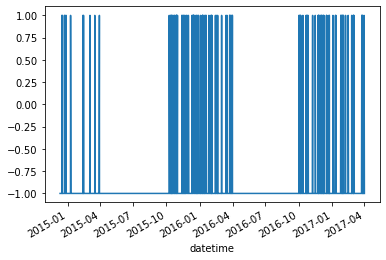

In [41]:
import pandas as pd
series = test_df["LES_Precipitation"]
series.plot()

### Building ARIMA model with growing window

In [41]:
# pip install statsmodels

In [44]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def run_rolling_forecasting(series, training_percentage=0.7):
    # Split the series into training and testing sets
    train_size = int(len(series) * training_percentage)
    train, test = series[0:train_size], series[train_size:]

    # Walk-forward validation and prediction
    history = [x for x in train]
    predictions = list()

    for t in range(len(test)):
        model = ARIMA(history, order=(5, 1, 0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test.values[t]  # Accessing values using NumPy array
        history.append(obs)
        print("%d/%d predicted=%f, expected=%f" % (t, len(test), yhat, obs))
        
    # Evaluate the model
    mse = mean_squared_error(test.values, predictions)
    mae = mean_absolute_error(test.values, predictions)

    return test.values, predictions, mse, mae


The run_rolling_forecasting function performs rolling forecasting using an ARIMA (AutoRegressive Integrated Moving Average) model on a given time series dataset. 
The series is split into training and testing sets, and the model is iteratively trained and validated in a walk-forward fashion. The function returns the true values (test.values), predicted values (predictions), mean squared error (mse), and mean absolute error (mae) for evaluation.

0/1122 predicted=-1.000000, expected=-1.000000
1/1122 predicted=-1.000000, expected=-1.000000
2/1122 predicted=-1.000000, expected=-1.000000
3/1122 predicted=-1.000000, expected=-1.000000
4/1122 predicted=-1.000000, expected=-1.000000
5/1122 predicted=-1.000000, expected=-1.000000
6/1122 predicted=-1.000000, expected=-1.000000
7/1122 predicted=-1.000000, expected=-1.000000
8/1122 predicted=-1.000000, expected=-1.000000
9/1122 predicted=-1.000000, expected=-1.000000
10/1122 predicted=-1.000000, expected=-1.000000
11/1122 predicted=-1.000000, expected=-1.000000
12/1122 predicted=-1.000000, expected=-1.000000
13/1122 predicted=-1.000000, expected=-1.000000
14/1122 predicted=-1.000000, expected=-1.000000
15/1122 predicted=-1.000000, expected=-1.000000
16/1122 predicted=-1.000000, expected=-1.000000
17/1122 predicted=-1.000000, expected=-1.000000
18/1122 predicted=-1.000000, expected=-1.000000
19/1122 predicted=-1.000000, expected=-1.000000
20/1122 predicted=-1.000000, expected=-1.000000
21

170/1122 predicted=-1.000000, expected=-1.000000
171/1122 predicted=-1.000000, expected=-1.000000
172/1122 predicted=-1.000000, expected=-1.000000
173/1122 predicted=-1.000000, expected=1.000000
174/1122 predicted=-0.009770, expected=-1.000000
175/1122 predicted=-0.674974, expected=-1.000000
176/1122 predicted=-0.787399, expected=-1.000000
177/1122 predicted=-0.816086, expected=-1.000000
178/1122 predicted=-0.823473, expected=-1.000000
179/1122 predicted=-0.878570, expected=-1.000000
180/1122 predicted=-1.000000, expected=-1.000000
181/1122 predicted=-1.000000, expected=-1.000000
182/1122 predicted=-1.000000, expected=-1.000000
183/1122 predicted=-1.000000, expected=-1.000000
184/1122 predicted=-1.000000, expected=-1.000000
185/1122 predicted=-1.000000, expected=-1.000000
186/1122 predicted=-1.000000, expected=1.000000
187/1122 predicted=-0.014362, expected=1.000000
188/1122 predicted=0.312170, expected=-1.000000
189/1122 predicted=-0.470255, expected=-1.000000
190/1122 predicted=-0.60

338/1122 predicted=-1.000000, expected=-1.000000
339/1122 predicted=-1.000000, expected=-1.000000
340/1122 predicted=-1.000000, expected=-1.000000
341/1122 predicted=-1.000000, expected=-1.000000
342/1122 predicted=-1.000000, expected=-1.000000
343/1122 predicted=-1.000000, expected=-1.000000
344/1122 predicted=-1.000000, expected=-1.000000
345/1122 predicted=-1.000000, expected=-1.000000
346/1122 predicted=-1.000000, expected=-1.000000
347/1122 predicted=-1.000000, expected=-1.000000
348/1122 predicted=-1.000000, expected=-1.000000
349/1122 predicted=-1.000000, expected=1.000000
350/1122 predicted=-0.034623, expected=-1.000000
351/1122 predicted=-0.666675, expected=-1.000000
352/1122 predicted=-0.767680, expected=-1.000000
353/1122 predicted=-0.834648, expected=-1.000000
354/1122 predicted=-0.798521, expected=-1.000000
355/1122 predicted=-0.888962, expected=-1.000000
356/1122 predicted=-1.000000, expected=-1.000000
357/1122 predicted=-1.000000, expected=1.000000
358/1122 predicted=-0.

506/1122 predicted=-0.684712, expected=-1.000000
507/1122 predicted=-0.891611, expected=-1.000000
508/1122 predicted=-1.000000, expected=-1.000000
509/1122 predicted=-1.000000, expected=-1.000000
510/1122 predicted=-1.000000, expected=-1.000000
511/1122 predicted=-1.000000, expected=-1.000000
512/1122 predicted=-1.000000, expected=-1.000000
513/1122 predicted=-1.000000, expected=-1.000000
514/1122 predicted=-1.000000, expected=-1.000000
515/1122 predicted=-1.000000, expected=-1.000000
516/1122 predicted=-1.000000, expected=-1.000000
517/1122 predicted=-1.000000, expected=-1.000000
518/1122 predicted=-1.000000, expected=-1.000000
519/1122 predicted=-1.000000, expected=-1.000000
520/1122 predicted=-1.000000, expected=-1.000000
521/1122 predicted=-1.000000, expected=-1.000000
522/1122 predicted=-1.000000, expected=-1.000000
523/1122 predicted=-1.000000, expected=-1.000000
524/1122 predicted=-1.000000, expected=-1.000000
525/1122 predicted=-1.000000, expected=-1.000000
526/1122 predicted=-

674/1122 predicted=-1.000000, expected=-1.000000
675/1122 predicted=-1.000000, expected=-1.000000
676/1122 predicted=-1.000000, expected=-1.000000
677/1122 predicted=-1.000000, expected=-1.000000
678/1122 predicted=-1.000000, expected=-1.000000
679/1122 predicted=-1.000000, expected=-1.000000
680/1122 predicted=-1.000000, expected=-1.000000
681/1122 predicted=-1.000000, expected=-1.000000
682/1122 predicted=-1.000000, expected=-1.000000
683/1122 predicted=-1.000000, expected=-1.000000
684/1122 predicted=-1.000000, expected=-1.000000
685/1122 predicted=-1.000000, expected=-1.000000
686/1122 predicted=-1.000000, expected=-1.000000
687/1122 predicted=-1.000000, expected=-1.000000
688/1122 predicted=-1.000000, expected=-1.000000
689/1122 predicted=-1.000000, expected=-1.000000
690/1122 predicted=-1.000000, expected=-1.000000
691/1122 predicted=-1.000000, expected=-1.000000
692/1122 predicted=-1.000000, expected=-1.000000
693/1122 predicted=-1.000000, expected=-1.000000
694/1122 predicted=-

842/1122 predicted=-1.000000, expected=-1.000000
843/1122 predicted=-1.000000, expected=1.000000
844/1122 predicted=-0.043318, expected=-1.000000
845/1122 predicted=-0.670180, expected=-1.000000
846/1122 predicted=-0.753732, expected=-1.000000
847/1122 predicted=-0.834531, expected=-1.000000
848/1122 predicted=-0.792879, expected=-1.000000
849/1122 predicted=-0.897619, expected=-1.000000
850/1122 predicted=-1.000000, expected=-1.000000
851/1122 predicted=-1.000000, expected=-1.000000
852/1122 predicted=-1.000000, expected=-1.000000
853/1122 predicted=-1.000000, expected=-1.000000
854/1122 predicted=-1.000000, expected=-1.000000
855/1122 predicted=-1.000000, expected=-1.000000
856/1122 predicted=-1.000000, expected=-1.000000
857/1122 predicted=-1.000000, expected=-1.000000
858/1122 predicted=-1.000000, expected=-1.000000
859/1122 predicted=-1.000000, expected=-1.000000
860/1122 predicted=-1.000000, expected=-1.000000
861/1122 predicted=-1.000000, expected=-1.000000
862/1122 predicted=-1

1010/1122 predicted=-1.000000, expected=-1.000000
1011/1122 predicted=-1.000000, expected=-1.000000
1012/1122 predicted=-1.000000, expected=-1.000000
1013/1122 predicted=-1.000000, expected=-1.000000
1014/1122 predicted=-1.000000, expected=-1.000000
1015/1122 predicted=-1.000000, expected=-1.000000
1016/1122 predicted=-1.000000, expected=-1.000000
1017/1122 predicted=-1.000000, expected=-1.000000
1018/1122 predicted=-1.000000, expected=-1.000000
1019/1122 predicted=-1.000000, expected=-1.000000
1020/1122 predicted=-1.000000, expected=-1.000000
1021/1122 predicted=-1.000000, expected=-1.000000
1022/1122 predicted=-1.000000, expected=-1.000000
1023/1122 predicted=-1.000000, expected=-1.000000
1024/1122 predicted=-1.000000, expected=-1.000000
1025/1122 predicted=-1.000000, expected=-1.000000
1026/1122 predicted=-1.000000, expected=-1.000000
1027/1122 predicted=-1.000000, expected=-1.000000
1028/1122 predicted=-1.000000, expected=-1.000000
1029/1122 predicted=-1.000000, expected=-1.000000


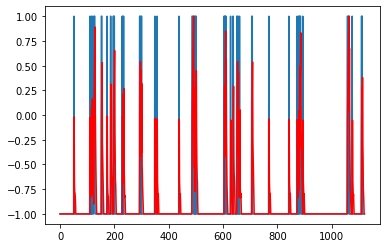

In [45]:
import matplotlib.pyplot as plt

test, predictions, mse, mae = run_rolling_forecasting(series, training_percentage=.7)
print("Test MAE: %.3f; MSE: %.3f" % (mae, mse))

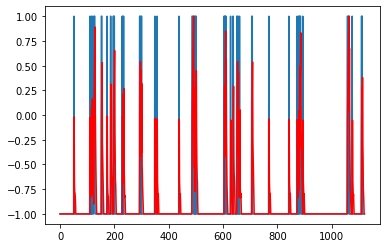

In [52]:
# plot
plt.plot(test)
plt.plot(predictions, color="red")
plt.show()

In [51]:
print("Test MAE: %.3f; MSE: %.3f" % (mae, mse))

Test MAE: 0.184; MSE: 0.237


In [46]:
test_df1 = test_df.rolling(window=3)
test_df1

Rolling [window=3,center=False,axis=0,method=single]

In [47]:
X_train.shape[1], X_train.shape[2]

(10, 13)

In [48]:
y_train.shape[1]  # n_future is the number of future time steps to predict

4

### Now, Building RNN LSTM to predict weather of next 4 days based on past 10 days

In [49]:
training_size = int ( 0.8 * data.shape[0])  
train_data = data.loc[0 : training_size - 1]
val_data = data.loc[training_size:]

In [50]:
train_data.head(10)

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation,datetime
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0,2006-10-01 14:00:00
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0,2006-10-01 15:00:00
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0,2006-10-01 16:00:00
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0,2006-10-01 17:00:00
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0,2006-10-01 18:00:00
5,48.0,86.0,0,0,0,0,0,10,995.0,1018.1,1017.9,0.0,0.0,2006-10-01 19:00:00
6,48.0,86.0,3,160,12000,0,0,10,994.3,1017.4,1017.3,0.0,0.0,2006-10-01 20:00:00
7,49.0,79.0,3,130,11000,0,0,10,994.3,1017.4,1017.3,0.0,0.0,2006-10-01 21:00:00
8,75.0,53.0,15,220,5000,0,0,10,989.7,1012.4,1012.5,0.0,0.0,2006-10-02 14:00:00
9,73.0,57.0,13,210,5000,10000,0,10,989.7,1012.3,1012.5,0.0,0.0,2006-10-02 15:00:00


### Preparing data for training 

In [49]:
# Check the number of features in your DataFrame
actual_n_features = X_train.shape[2]

if actual_n_features != n_features:
    raise ValueError(f"Number of features in the data ({actual_n_features}) does not match n_features ({n_features}).")

# Reshape the input data
X_train = X_train.reshape((X_train.shape[0], n_past, actual_n_features))
X_test = X_test.reshape((X_test.shape[0], n_past, actual_n_features))


### RNN LSTM model

The defined LSTM model consists of a single LSTM layer with 64 units and a hyperbolic tangent (tanh) activation function, followed by a dense output layer. The input shape is determined by n_past (number of past observations) and n_features (number of features). The model is compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function. Precision is monitored as a metric during training. Learning rate scheduling, early stopping, and model checkpointing are implemented during training to enhance model performance and save the best weights. The model is trained for 15 epochs, and the best weights are saved to 'model.h5'.

In [50]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import keras.backend as K

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(n_past, n_features)))
model.add(Dense(n_future * n_features))  # Assuming a dense output layer for each feature in the future


# Compile the model
model.compile(optimizer='adam', loss='mse', metrics = [tf.keras.metrics.Precision(name='precision')])  # Use appropriate loss function depending on your problem

from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping

earlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

from keras.models import load_model

try:
    model = load_model('model.h5')
    print("Model loaded successfully")
except:
    print("No model found")
    
epoch = 15

# Define a step decay function
def step_decay(epoch):
    initial_lr = 0.001  # Initial learning rate
    drop = 0.5  # Learning rate drop factor
    epochs_drop = 5  # Number of epochs after which learning rate will drop
    new_lr = initial_lr * (drop ** (epoch // epochs_drop))
    return new_lr

lr_schedule = LearningRateScheduler(step_decay, verbose = 1)
model_save = ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Reshape the input data
X_train = X_train.reshape((X_train.shape[0], n_past, n_features))
X_test = X_test.reshape((X_test.shape[0], n_past, n_features))

# Fit the model
history = model.fit(X_train, y_train.reshape((y_train.shape[0], n_future * n_features)), epochs=epoch, batch_size=32, validation_split=0.2, callbacks = [earlyStop, lr_schedule, model_save])

2023-12-03 21:51:00.540499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 21:51:00.549283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 21:51:00.549911: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model loaded successfully

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/15


2023-12-03 21:51:01.998140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-03 21:51:02.321435: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f493804e180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-03 21:51:02.321493: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-12-03 21:51:02.325994: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-03 21:51:02.442555: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 [==============================] - 3s 6ms/step - loss: 0.1112 - precision: 0.9977 - val_loss: 0.1360 - val_precision: 0.9967 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/15
 36/280 [==>...........................] - ETA: 1s - loss: 0.1099 - precision: 0.9980

/home/tarush/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


280/280 [==============================] - 1s 4ms/step - loss: 0.1110 - precision: 0.9976 - val_loss: 0.1372 - val_precision: 0.9972 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/15
280/280 [==============================] - 1s 4ms/step - loss: 0.1104 - precision: 0.9976 - val_loss: 0.1348 - val_precision: 0.9973 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/15
280/280 [==============================] - 1s 4ms/step - loss: 0.1102 - precision: 0.9977 - val_loss: 0.1361 - val_precision: 0.9972 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/15
280/280 [==============================] - 1s 3ms/step - loss: 0.1094 - precision: 0.9977 - val_loss: 0.1369 - val_precision: 0.9975 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.0005.
Epoch 6/15
280/280 [==============================] - 1s 3ms/step - loss: 0.1081 - precision: 0.9977 - val_loss: 0.1367 - val_

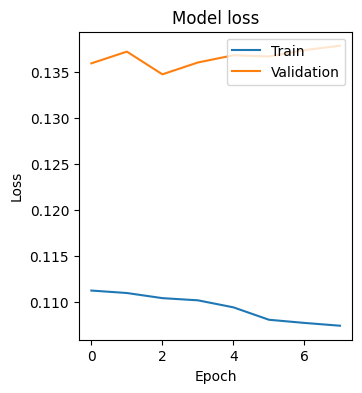

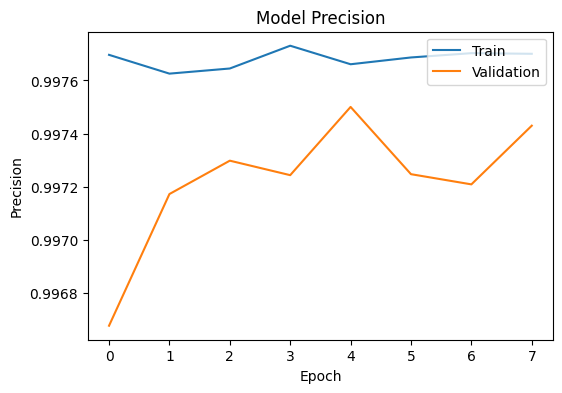

In [51]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation precision values
plt.figure(figsize=(6, 4))
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [52]:
# Evaluate the model
loss = model.evaluate(X_test, y_test.reshape((y_test.shape[0], n_future * n_features)))
print(f"Test Loss: {loss}")


117/117 [==============================] - 1s 3ms/step - loss: 0.1399 - precision: 0.9978
Test Loss: [0.1398521214723587, 0.9978437423706055]


The LSTM model achieved a test loss of approximately 0.140, with a precision metric of approximately 99.78%. These metrics indicate good performance in minimizing the mean squared error and achieving high precision during the evaluation on the test dataset.

In [53]:
# Make predictions
predictions = model.predict(X_test)
predictions = predictions.reshape((predictions.shape[0], n_future, n_features))


117/117 [==============================] - 0s 1ms/step


### Make predictions

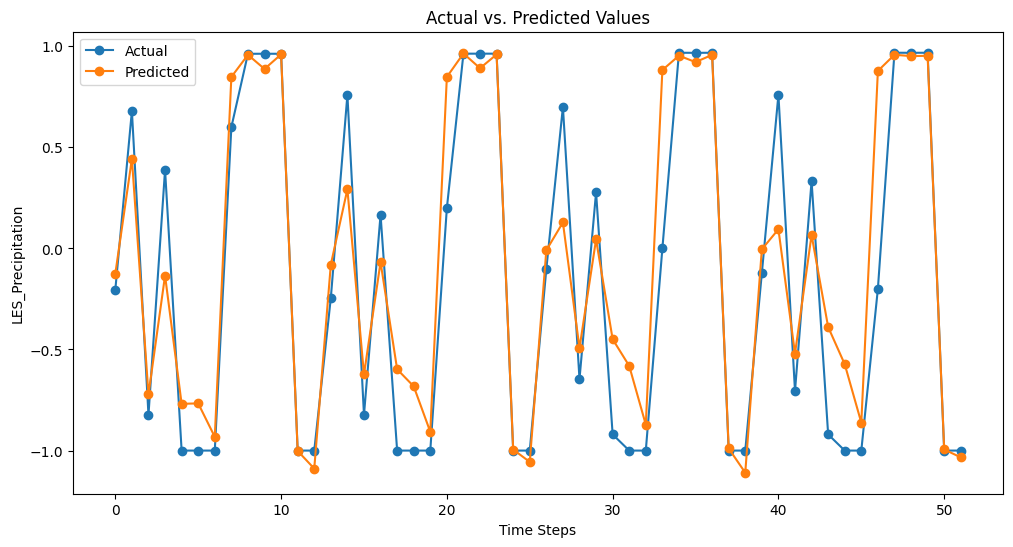

In [54]:
import matplotlib.pyplot as plt

example_index = 0

# Extract actual and predicted values for the selected example
actual_values = y_test[example_index]
predicted_values = predictions[example_index]

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_values.flatten(), label='Actual', marker='o')
plt.plot(predicted_values.flatten(), label='Predicted', marker='o')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('LES_Precipitation')
plt.legend()
plt.show()


In [55]:
df = pd.DataFrame({'Actual': actual_values.flatten(), 'Predicted': predicted_values.flatten()})
print(df.head(5))

### as we used minmax scaler, we need to inverse transform the data to get the actual values 
actual = scalers['scaler_LES_Precipitation'].inverse_transform(df['Actual'].values.reshape(-1,1))
predicted = scalers['scaler_LES_Precipitation'].inverse_transform(df['Predicted'].values.reshape(-1,1))

df = pd.DataFrame({'Actual': actual.flatten(), 'Predicted': predicted.flatten()})
print(df.head(5))
print(df.shape)

     Actual  Predicted
0 -0.204082  -0.125156
1  0.680000   0.443186
2 -0.823529  -0.722444
3  0.388889  -0.134368
4 -1.000000  -0.768813
     Actual  Predicted
0  0.397959   0.437422
1  0.840000   0.721593
2  0.088235   0.138778
3  0.694444   0.432816
4  0.000000   0.115593
(52, 2)


The comparison suggests that the model is capturing the underlying patterns in the data, leading to reasonably accurate predictions.

### Now, working with images: Adding CNN

We can use CNN to get the actual and predicted values are closer to the actual value.

In [108]:
#### first we create a dataframe that contains path to the images lake-michigan-64-2006-2017/lake-michigan-images-64
import os

path = 'lake-michigan-images-64'
data = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".png"):
             data.append(os.path.join(root, file))
             
df = pd.DataFrame(data, columns=['path'])
print(df.head(5))

                                path
0   lake-michigan-images-64/3975.png
1   lake-michigan-images-64/8820.png
2  lake-michigan-images-64/14392.png
3   lake-michigan-images-64/9280.png
4    lake-michigan-images-64/348.png


In [109]:
### Now we will use a model like inceptionV3 to extract features from the images giving us a thought vector of 2048 dimensions
### we will use this vector as initial_state for our LSTM model to allow for better inference to be made

from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# Load the InceptionV3 model
image_model = InceptionV3(include_top=True, weights='imagenet')

# Get the transfer layer
transfer_layer = image_model.get_layer('avg_pool')
print(transfer_layer.output)
print(transfer_layer.output_shape)
print(transfer_layer.name)
# Create a new model with the input of the original model and the output of the transfer layer
image_model_transfer = Model(inputs=image_model.input, outputs=transfer_layer.output)
print(image_model.summary())

96112376/96112376 [==============================] - 133s 1us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")
(None, 2048)
avg_pool
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_102 (Conv2D)         (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_102[0][0]']          
 tchNormalization)                            

                                                                                                  
 conv2d_109 (Conv2D)         (None, 35, 35, 64)           76800     ['activation_100[0][0]']      
                                                                                                  
 conv2d_112 (Conv2D)         (None, 35, 35, 96)           82944     ['activation_103[0][0]']      
                                                                                                  
 conv2d_113 (Conv2D)         (None, 35, 35, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, 35, 35, 64)           192       ['conv2d_107[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 batch_nor

 activation_106 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_106[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_108 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_108[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 35, 35, 96)           0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_112[0][0
 )        

 batch_normalization_121 (B  (None, 35, 35, 64)           192       ['conv2d_129[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_121 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_121[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_130 (Conv2D)         (None, 35, 35, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, 35, 35, 96)           288       ['conv2d_130[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_12 (Aver  (None, 17, 17, 768)          0         ['mixed3[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_132 (Conv2D)         (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_135 (Conv2D)         (None, 17, 17, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_140 (Conv2D)         (None, 17, 17, 192)          172032    ['activation_131[0][0]']      
          

                                                                                                  
 activation_136 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_136[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_141 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 17, 17, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_14

 batch_normalization_146 (B  (None, 17, 17, 160)          480       ['conv2d_154[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_151 (B  (None, 17, 17, 160)          480       ['conv2d_159[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_151[0][0
 )        

                                                                                                  
 conv2d_164 (Conv2D)         (None, 17, 17, 192)          258048    ['activation_155[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 17, 17, 192)          258048    ['activation_160[0][0]']      
                                                                                                  
 batch_normalization_156 (B  (None, 17, 17, 192)          576       ['conv2d_164[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 17, 17, 192)          576       ['conv2d_169[0][0]']          
 atchNormalization)                                                                               
          

 activation_164 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_164[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_168 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_168[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_173 (Conv2D)         (None, 8, 8, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_177 (Conv2D)         (None, 8, 8, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_nor

 activation_172 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_172[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_173 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_173[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_177[0][0
 )        

 batch_normalization_179 (B  (None, 8, 8, 320)            960       ['conv2d_187[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_181 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_181[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_185[0][0
 )        

In [110]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image as keras_image 
import pickle
from tqdm import tqdm
# Create a new model with 'fc2' as the output layer
image_model_transfer = Model(inputs=image_model.input, outputs=transfer_layer.output)

# Function to encode an image using the VGG16 model
def encode_image(image_path):
    img = keras_image.load_img(image_path, target_size=(299, 299))
    x = keras_image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    image_features = image_model_transfer.predict(x, verbose=0)

    image_features = np.reshape(image_features, image_features.shape[1])
    return image_features

# Function to preprocess and cache images
def pre_process_and_caches(images_path, df):
    encoded_images = {}
    for image_path in tqdm(df['path']):
        encoded_images[image_path] = encode_image(image_path)

    return encoded_images


if not os.path.exists('encodedData.pkl'):
    encoded_images_train = pre_process_and_caches(path, df)
    with open('encodedData.pkl', 'wb') as f:
        pickle.dump(encoded_images_train, f)
        
else:
    with open('encodedData.pkl', 'rb') as f:
        encoded_images_train = pickle.load(f)
        
print('Encoded Images Train:', len(encoded_images_train))

100%|██████████| 15959/15959 [30:57<00:00,  8.59it/s]   


Encoded Images Train: 15959


In [111]:
#### as our images are more than the meteorological data, we will use the meteorological data as input to the LSTM model
#### and the thought vector as the initial state of the LSTM model

#### we will use the thought vector as the initial state of the LSTM model
#### we will create a new dataframe that contains the thought vector and the meteorological data for each image 

df['image_features'] = df['path'].map(encoded_images_train)
print(df.head(5))

### Now as we have 15959 images and 14951 rows of meteorological data, we see there is a a difference of 1008 rows of data 
### this is because we have 1008 hours of data missing from the meteorological data so we will only take 14951 images of data and add the imagte_features 
### to the dataframe

df = df[:14951]
print(df.shape)

### we will now add the meteorological data to the dataframe
data_copy['path'] = df['path']
data_copy['image_features'] = df['image_features']
print(data_copy.head(5))


                                path  \
0   lake-michigan-images-64/3975.png   
1   lake-michigan-images-64/8820.png   
2  lake-michigan-images-64/14392.png   
3   lake-michigan-images-64/9280.png   
4    lake-michigan-images-64/348.png   

                                      image_features  
0  [3.498706, 8.828771, 70.22296, 0.8446596, 39.6...  
1  [0.17371958, 6.2715273, 134.91774, 0.0, 88.910...  
2  [0.8651295, 15.975661, 64.842804, 1.763045, 49...  
3  [3.0450559, 10.642885, 40.31116, 2.5280874, 26...  
4  [1.5536363, 13.073158, 78.89961, 1.7137948, 43...  
(14951, 2)


NameError: name 'data_copy' is not defined